In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import defaultdict
import numpy as np
import pandas as pd
# read names and postions from bed file
positions = defaultdict(list)
extra = []
with open('../../Data/Seq_indexes.bed') as f:
    for line in f:
        name, start, stop, label = line.split()
        extra.append(label)
        positions[name].append((int(start), int(stop), label))

# parse faste file and turn into dictionary
records = SeqIO.to_dict(SeqIO.parse(open('../../Data/chr1.fa'), 'fasta'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Extracting Fasta to tabular
https://stackoverflow.com/questions/30503543/python-extract-dna-sequence-from-fasta-file-using-bed-file
https://biopython.org/wiki/SeqIO

In [3]:
chromosomes = []
for i in range(1, 23):
    chromosomes.append('chr' + str(i))
chromosomes.append('chrX')
print(chromosomes)

print(positions[chromosomes[0]][0])

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']
(10000, 10600, '21_Het')


In [4]:
# The Letters in the Sequences
letters = {}
for seq in df['seq'].values:
    if len(seq) < 1000:
        for letter in seq:
            if letter not in letters:
                letters[letter] = 1
print(letters) 

NameError: name 'df' is not defined

In [49]:
d = {}
count = 0

for chrom in chromosomes:
    records = SeqIO.to_dict(SeqIO.parse(open('../../Data/' + (chrom) + '.fa'), 'fasta'))
    long_seq_record = records[chrom]
    long_seq = long_seq_record.seq
    chrom_seq = str(long_seq)
    for (start, stop, label) in positions[chrom]:
        d[count] = {"chrom": chrom, "seq": chrom_seq[start-1:stop], "label": label}
        count += 1
df = df.from_dict(d, "index")
print(df)

       chrom                                                seq     label
0       chr1  Ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  ATCTTATCTTTATATGATTCCCTTGCTGCCTGGAGATTGACATTTC...  25_Quies
3       chr1  ATTAAGTACACATCTTATTTTCCAGTGATAATGCTACCGGCAAATT...  25_Quies
4       chr1  GCCTGATTCATGGCTgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  ATCTCTCTCAAATTGACCTAATTGGTTTCATTCTCAGCAAAATGAC...    21_Het
751505  chrX  CCCCTGTTCACCTCAGCCCTGCACCCTTTCACCCTCCTGTAAGCCC...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]


In [51]:
df.to_csv('output_123.csv.gz'
         , sep='|'
         , header=True
         , index=False
         , chunksize=100000
         , compression='gzip'
         , encoding='utf-8')

In [112]:
print(df)
count = 0
for i in range(len(df['seq'].values)):
    if i == 2:
        print(df['seq'][i])
    df['seq'][i] = df['seq'][i].lower()
    count += 1
    
print(df)

       chrom                                                seq     label
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  atcttatctttatatgattcccttgctgcctggagattgacatttc...  25_Quies
3       chr1  attaagtacacatcttattttccagtgataatgctaccggcaaatt...  25_Quies
4       chr1  gcctgattcatggctgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  ATCTCTCTCAAATTGACCTAATTGGTTTCATTCTCAGCAAAATGAC...    21_Het
751505  chrX  CCCCTGTTCACCTCAGCCCTGCACCCTTTCACCCTCCTGTAAGCCC...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]
atcttatctttatatgattcccttgctgcctggagattgacatttccttggggataatctggtcataggattggtgaaggtggaa

In [114]:
df.to_csv('genome_lower.csv.gz'
         , sep='|'
         , header=True
         , index=False
         , chunksize=100000
         , compression='gzip'
         , encoding='utf-8')

In [13]:
df = pd.read_csv('../../Data/genome_lower.csv.gz', compression='gzip', sep ="|")

In [14]:
print(df)

       chrom                                                seq     label
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  atcttatctttatatgattcccttgctgcctggagattgacatttc...  25_Quies
3       chr1  attaagtacacatcttattttccagtgataatgctaccggcaaatt...  25_Quies
4       chr1  gcctgattcatggctgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  atctctctcaaattgacctaattggtttcattctcagcaaaatgac...    21_Het
751505  chrX  cccctgttcacctcagccctgcaccctttcaccctcctgtaagccc...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]


In [15]:
labels_25 = {'1_TssA': 1, '2_PromU': 2, '3_PromD1':3, '4_PromD2':4, "5_Tx5'":5, '6_Tx':6, \
          "7_Tx3'":7, '8_TxWk':8, '9_TxReg':9, "10_TxEnh5'":10, "11_TxEnh3'":11, '12_TxEnhW':12, \
          '13_EnhA1':13, '14_EnhA2':14, '15_EnhAF':15, '16_EnhW1':16, '17_EnhW2':17, '18_EnhAc':18,\
          '19_DNase':19, '20_ZNF/Rpts':20, '21_Het':21, '22_PromP':22, '23_PromBiv':23, \
          '24_ReprPC':24, '25_Quies':25}
print(len(labels_25))
from sklearn import preprocessing
labels = df['label'].values.tolist()
for i, label in enumerate(labels):
    labels[i] = labels_25[label]
print(labels[0:10])

25
[21, 25, 25, 25, 25, 19, 25, 25, 25, 19]


In [16]:
df_data = df.copy(deep=True)
print(df_data)
df_data.insert(loc=3, column='labels', value=labels)
df_data = df_data.drop(columns=['label'])
print(df_data)

       chrom                                                seq     label
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...    21_Het
1       chr1  tgaggagaacgcaactccgccgttgcaaaggcgcgccgcgccggcg...  25_Quies
2       chr1  atcttatctttatatgattcccttgctgcctggagattgacatttc...  25_Quies
3       chr1  attaagtacacatcttattttccagtgataatgctaccggcaaatt...  25_Quies
4       chr1  gcctgattcatggctgaaatcacgtttgaccagctatgtgtgtctc...  25_Quies
...      ...                                                ...       ...
751504  chrX  atctctctcaaattgacctaattggtttcattctcagcaaaatgac...    21_Het
751505  chrX  cccctgttcacctcagccctgcaccctttcaccctcctgtaagccc...  25_Quies
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...    21_Het
751507  chrX  tttgtgtgtgtgtgtctcgtgtgtgtgtgtctgtgtgtatctgtgt...  25_Quies
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...    21_Het

[751509 rows x 3 columns]
       chrom                                                seq  labels
0       chr1 

In [17]:
df_data.drop(df_data.loc[df_data['labels']==25].index, inplace=True)
print(df_data)

       chrom                                                seq  labels
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...      21
5       chr1  ccccaagggcatcttctcaaagttggatgtgtgcattttcctgaga...      19
9       chr1  cgcactctcccctgaactctacacaacatattttgtcaccaagacc...      19
11      chr1  aggctggggtgcagtggtgtgatcttggcccagtgcaacctctgcc...      22
12      chr1  cgcctcggcctcccaaagtgttgggattacaggtgtcagccactga...       4
...      ...                                                ...     ...
751500  chrX  gcttacctgctgtctgcagatctgagctttcttcttggacacctta...      21
751502  chrX  cctgttgctccgattatatcaatgattttcttggataagggggtga...      21
751504  chrX  atctctctcaaattgacctaattggtttcattctcagcaaaatgac...      21
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...      21
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...      21

[583429 rows x 3 columns]


In [18]:
df_data.drop(df_data.loc[df_data['labels']==17].index, inplace=True)
print(df_data)

       chrom                                                seq  labels
0       chr1  ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...      21
5       chr1  ccccaagggcatcttctcaaagttggatgtgtgcattttcctgaga...      19
9       chr1  cgcactctcccctgaactctacacaacatattttgtcaccaagacc...      19
11      chr1  aggctggggtgcagtggtgtgatcttggcccagtgcaacctctgcc...      22
12      chr1  cgcctcggcctcccaaagtgttgggattacaggtgtcagccactga...       4
...      ...                                                ...     ...
751500  chrX  gcttacctgctgtctgcagatctgagctttcttcttggacacctta...      21
751502  chrX  cctgttgctccgattatatcaatgattttcttggataagggggtga...      21
751504  chrX  atctctctcaaattgacctaattggtttcattctcagcaaaatgac...      21
751506  chrX  gtgtgtgtatgtctgtgtgtgtgtgtttatgtgtgtgtgtctgtgt...      21
751508  chrX  ttggggttggggttggggttagggtttgggtttagggttggggtag...      21

[477070 rows x 3 columns]


In [19]:
df_data = df_data.head(n=50000)
df_data

,chrom,seq,labels
0,chr1,ntaaccctaaccctaaccctaaccctaaccctaaccctaaccctaa...,21
5,chr1,ccccaagggcatcttctcaaagttggatgtgtgcattttcctgaga...,19
9,chr1,cgcactctcccctgaactctacacaacatattttgtcaccaagacc...,19
11,chr1,aggctggggtgcagtggtgtgatcttggcccagtgcaacctctgcc...,22
12,chr1,cgcctcggcctcccaaagtgttgggattacaggtgtcagccactga...,4
...,...,...,...
77463,chr2,gcttgtagaagtccctgcagagccctgctgtctgctcacccctgtt...,19
77467,chr2,ctgacctcatgatccgcctacctcagcctcccaaagtgctgggatt...,21
77471,chr2,cctaacgcccagtactgcagaatgtgaccttatttggaatagggtc...,24
77472,chr2,caaccctgttgggtgctgcaggcagaggctactggcagaggtggcc...,23


[8, 7, 19, 5, 15, 21, 12, 16, 24, 2, 6, 1, 23, 3, 4, 22, 14, 13, 10, 11, 20, 18, 9]
[8593, 5399, 4071, 3482, 3205, 3130, 2444, 2397, 2304, 2158, 1716, 1641, 1608, 1554, 1262, 1021, 910, 841, 695, 444, 411, 397, 317]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24]
[1641, 2158, 1554, 1262, 3482, 1716, 5399, 8593, 317, 695, 444, 2444, 841, 910, 3205, 2397, 397, 4071, 411, 3130, 1021, 1608, 2304]


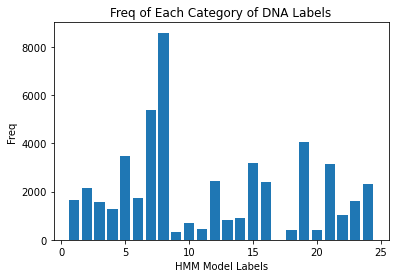

Total Num Seq: 50000


In [20]:
labels = df_data['labels'].value_counts()
labels_num = (labels.index).tolist()
labels_freq = labels.tolist()
print(labels_num)
print(labels_freq)
count = 0
for x, y in sorted(zip(labels_num, labels_freq)):
    labels_num[count] = x
    labels_freq[count] = y 
    count += 1
print(labels_num)
print(labels_freq)

labels = labels_num

plt.bar(labels_num,labels_freq, align = 'center')
plt.ylabel('Freq')
plt.xlabel('HMM Model Labels')
plt.title('Freq of Each Category of DNA Labels')
plt.show()
print("Total Num Seq: " + str(sum(labels_freq)))

K-mers Created
https://github.com/krishnaik06/DNA-Sequencing-Classifier/blob/master/DNA%20Sequencing%20and%20applying%20Classifier.ipynb

In [21]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [22]:
df_kmers = df_data
df_kmers['words'] = df_data.apply(lambda x: getKmers(x['seq']), axis=1)
df_kmers = df_kmers.drop('seq', axis=1)

In [23]:
df_kmers.head()

,chrom,labels,words
0,chr1,21,"[ntaacc, taaccc, aaccct, acccta, ccctaa, cctaa..."
5,chr1,19,"[ccccaa, cccaag, ccaagg, caaggg, aagggc, agggc..."
9,chr1,19,"[cgcact, gcactc, cactct, actctc, ctctcc, tctcc..."
11,chr1,22,"[aggctg, ggctgg, gctggg, ctgggg, tggggt, ggggt..."
12,chr1,4,"[cgcctc, gcctcg, cctcgg, ctcggc, tcggcc, cggcc..."


In [25]:
df_kmers_texts = list(df_kmers['words'])
for item in range(len(df_kmers)):
    df_kmers_texts[item] = ' '.join(df_kmers_texts[item])
y_data = df_kmers.iloc[:, 0].values
print(df_kmers_texts[2])


cgcact gcactc cactct actctc ctctcc tctccc ctcccc tcccct cccctg ccctga cctgaa ctgaac tgaact gaactc aactct actcta ctctac tctaca ctacac tacaca acacaa cacaac acaaca caacat aacata acatat catatt atattt tatttt attttg ttttgt tttgtc ttgtca tgtcac gtcacc tcacca caccaa accaag ccaaga caagac aagacc agaccc gaccct acccta ccctac cctact ctactt tacttc acttct cttctg ttctga tctgac ctgacc tgacct gacctc acctcc cctccc ctccct tccctg ccctgt cctgtt ctgttc tgttct gttctt ttctta tcttat cttatg ttatga tatgaa atgaat tgaatt gaattc aattcg attcga ttcgaa tcgaac cgaaca gaacag aacagc acagca cagcat agcata gcatac catacc ataccc tacccc accccc cccccg ccccga cccgat ccgatt cgattc gattcc attccg ttccgc tccgct ccgcta cgctac gctacg ctacga tacgac acgacc cgacca gaccaa accaac ccaact caactc aactca actcat ctcata tcatac cataca atacac tacacc acacct cacctc acctcc cctcct ctccta tcctat cctatg ctatga tatgaa atgaaa tgaaaa gaaaaa aaaaaa aaaaac aaaact aaactt aacttc acttcc cttcct ttccta tcctac cctacc ctacca taccac accact ccactc cactca actcac ctcacc

In [37]:
print(len(df_kmers_texts))

50000


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(df_kmers_texts)
print(X.shape)


(50000, 262113)


<AxesSubplot:>

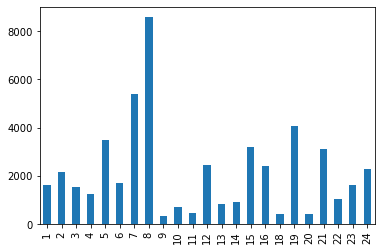

In [31]:
df_kmers['labels'].value_counts().sort_index().plot.bar()

In [ ]:
df_kmers.to_csv('dataset_kmer_6_test.csv.gz'
         , sep='|'
         , header=True
         , index=False
         , chunksize=100000
         , compression='gzip'
         , encoding='utf-8')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)

(40000, 262113)
(10000, 262113)


Testing a Naive_Bayes Classifier

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  chr1  chr2
Actual               
chr1       6912  1778
chr2        977   333
accuracy = 0.725 
precision = 0.782 
recall = 0.725 
f1 = 0.750
